In [25]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import geopandas as gpd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Importation des données :

On cherche à fusionner tout les fichier qu'on a dans le fichier transactions-er en un seul fichier afain d'avoir le maximum de données possible.

In [113]:
folder = '/home/hiba/projet/back-end/transactions-ser'
csv_files = [f for f in os.listdir(folder) if f.endswith('.csv')]
df = pd.read_csv(os.path.join(folder, csv_files[0]),delimiter=';')
common_columns = list(df.columns)

In [114]:
for file in csv_files[1:]:
    df_temp = pd.read_csv(os.path.join(folder, file), delimiter=';')
    # Keep only the columns that are present in the first CSV file
    df_temp = df_temp[common_columns]
    df = df.append(df_temp, ignore_index=False)
df.to_csv('merged.csv')

/tmp/ipykernel_4997/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_4997/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_4997/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_4997/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp, ignore_index=False)
/tmp/ipykernel_4997/3742714939.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future ve

In [115]:
df = df.replace({'None': None, 'nan': float('nan')})
df

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe
0,2022-359835,2022-03-18,1,Vente,115000.0,9001.0,None,IMMEUBLE ATLANTIDE,A651,76800,...,110.0,6.0,None,None,None,None,NaN,1.071577,49.393501,000BS
1,2022-359835,2022-03-18,1,Vente,115000.0,9001.0,None,IMMEUBLE ATLANTIDE,A651,76800,...,NaN,0.0,None,None,None,None,NaN,1.071577,49.393501,000BS
2,2022-359041,2022-01-18,1,Vente,181300.0,4.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,83.0,4.0,S,sols,None,None,97.0,1.068890,49.391763,000BS
3,2022-359041,2022-01-18,1,Vente,181300.0,4.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,NaN,0.0,S,sols,None,None,12.0,1.068805,49.391922,000BS
4,2022-359041,2022-01-18,1,Vente,181300.0,1.0,None,ALL DU CLOS MAJORELLE,0517,76800,...,NaN,0.0,S,sols,None,None,13.0,1.068709,49.392102,000BS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89,2017-545059,2017-10-25,1,Vente,170000.0,171.0,None,RUE DE PARIS,1840,76800,...,140.0,6.0,S,sols,None,None,727.0,1.106699,49.388487,000BD
90,2017-544418,2017-09-26,1,Vente,174000.0,19.0,None,RUE DE LA REPUBLIQUE,2180,76800,...,57.0,4.0,S,sols,None,None,448.0,1.105192,49.389305,000BD
91,2017-544418,2017-09-26,1,Vente,174000.0,15.0,None,RUE DE LA REPUBLIQUE,2180,76800,...,NaN,NaN,S,sols,None,None,220.0,1.104911,49.389243,000BD
92,2017-543711,2017-08-07,1,Vente,250000.0,145.0,None,RUE DE PARIS,1840,76800,...,153.0,5.0,J,jardins,POTAG,Jardin potager,685.0,1.106324,49.389849,000BD


On a donc un dataFrame de 2972 lignes et 41 colonnes.

### Nettoyage du dataFrame

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2972 entries, 0 to 93
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   2972 non-null   object 
 1   date_mutation                 2972 non-null   object 
 2   numero_disposition            2972 non-null   int64  
 3   nature_mutation               2972 non-null   object 
 4   valeur_fonciere               2922 non-null   float64
 5   adresse_numero                2487 non-null   float64
 6   adresse_suffixe               117 non-null    object 
 7   adresse_nom_voie              2957 non-null   object 
 8   adresse_code_voie             2957 non-null   object 
 9   code_postal                   2957 non-null   object 
 10  code_commune                  2972 non-null   int64  
 11  nom_commune                   2972 non-null   object 
 12  code_departement              2972 non-null   int64  
 13  ancie

On remarque la présence de beaucoup de valeurs nulls. On commence d'abord par supprimer les valeurs nulls des colonnes qui nous interessent le plus : valeur_foncier et surface_reelle_bati, puis on va remplacer les valeurs manquantes de surface_terrain avec 0

In [117]:
df.dropna(subset = ["valeur_fonciere"], inplace = True)
df.dropna(subset = ["surface_reelle_bati"], inplace = True)
df['surface_terrain'] = df['surface_terrain'].fillna(0)
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1613 entries, 0 to 93
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_mutation                   1613 non-null   object 
 1   date_mutation                 1613 non-null   object 
 2   numero_disposition            1613 non-null   int64  
 3   nature_mutation               1613 non-null   object 
 4   valeur_fonciere               1613 non-null   float64
 5   adresse_numero                1611 non-null   float64
 6   adresse_suffixe               67 non-null     object 
 7   adresse_nom_voie              1613 non-null   object 
 8   adresse_code_voie             1613 non-null   object 
 9   code_postal                   1613 non-null   object 
 10  code_commune                  1613 non-null   int64  
 11  nom_commune                   1613 non-null   object 
 12  code_departement              1613 non-null   int64  
 13  ancie

In [118]:
df['date_mutation'] = pd.to_datetime(df['date_mutation'])
df['année'] = df['date_mutation'].dt.year

Vu qu'on s'intéresse qu'aux maisons et aux appratements, on va supprimer les autres valeurs sur la colonne "type_local" et on garde que les maisons et les appartement.

In [119]:
df = df.loc[(df['type_local'] == 'Maison') | (df['type_local'] == 'Appartement')]

Ensuite, on converti la colonne du code_type_local en entier, afin de faciliter les manipulations.

In [120]:
df['code_type_local'] = pd.to_numeric(df['code_type_local'], errors='coerce', downcast='integer')

/tmp/ipykernel_4997/1635837497.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['code_type_local'] = pd.to_numeric(df['code_type_local'], errors='coerce', downcast='integer')


On va aussi supprimer les ventes de lots qui sont suppérieur à 1 ainsi que les valeurs qui ne sount pas cohérente : si la surface carrez est suppérieur à la surface bati, c'est une erreur.

In [121]:
df = df.drop(df.loc[df["nombre_lots"]> 1].index)
df.groupby("nombre_lots")[['valeur_fonciere']].count().sort_values("nombre_lots")
df = df.drop(df.loc[df["lot1_surface_carrez"] > df["surface_reelle_bati"]].index)

On ajoute une nouvelle colonne "surface", qui prend la surface bati si c'est une maison ou la surface du lot carrez si c'est un appartement

In [122]:
df['surface'] = np.where(df["code_type_local"] == 1, df["surface_reelle_bati"],df["lot1_surface_carrez"])
df.dropna(subset = ["surface"], inplace = True)

On supprime les colonnes qui ont plus de 10% de données manquantes

In [123]:
df = df.dropna(thresh=len(df) * 0.10, axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 73
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   id_mutation                394 non-null    object        
 1   date_mutation              394 non-null    datetime64[ns]
 2   numero_disposition         394 non-null    int64         
 3   nature_mutation            394 non-null    object        
 4   valeur_fonciere            394 non-null    float64       
 5   adresse_numero             394 non-null    float64       
 6   adresse_nom_voie           394 non-null    object        
 7   adresse_code_voie          394 non-null    object        
 8   code_postal                394 non-null    object        
 9   code_commune               394 non-null    int64         
 10  nom_commune                394 non-null    object        
 11  code_departement           394 non-null    int64         
 12  id_parcel

In [124]:
df = df.drop(['id_mutation','nature_mutation' , 'adresse_numero','adresse_nom_voie' ,'adresse_code_voie','code_postal', 'nom_commune','code_departement', 'id_parcelle', 'date_mutation','numero_disposition','code_nature_culture','nature_culture','code_commune'], axis=1)

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valeur_fonciere            394 non-null    float64
 1   nombre_lots                394 non-null    int64  
 2   code_type_local            394 non-null    int8   
 3   type_local                 394 non-null    object 
 4   surface_reelle_bati        394 non-null    float64
 5   nombre_pieces_principales  394 non-null    float64
 6   surface_terrain            394 non-null    float64
 7   longitude                  394 non-null    float64
 8   latitude                   394 non-null    float64
 9   section_prefixe            394 non-null    object 
 10  année                      394 non-null    int64  
 11  surface                    394 non-null    float64
dtypes: float64(7), int64(2), int8(1), object(2)
memory usage: 37.3+ KB


In [126]:
df

,valeur_fonciere,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe,année,surface
0,115000.0,1,2,Appartement,110.0,6.0,0.0,1.071577,49.393501,000BS,2022,103.35
16,73000.0,1,2,Appartement,100.0,5.0,0.0,1.071577,49.393501,000BS,2021,94.23
21,375000.0,0,1,Maison,129.0,4.0,1765.0,1.062906,49.390630,000BS,2021,129.00
24,275000.0,0,1,Maison,143.0,6.0,187.0,1.065427,49.390566,000BS,2021,143.00
38,137000.0,0,1,Maison,63.0,4.0,581.0,1.061040,49.392848,000BS,2021,63.00
...,...,...,...,...,...,...,...,...,...,...,...,...
38,175000.0,0,1,Maison,87.0,3.0,861.0,1.106560,49.388892,000BD,2019,87.00
43,93000.0,0,1,Maison,83.0,4.0,133.0,1.105306,49.388171,000BD,2019,83.00
55,90000.0,0,1,Maison,58.0,3.0,58.0,1.105265,49.387870,000BD,2019,58.00
71,91000.0,0,1,Maison,54.0,3.0,43.0,1.105094,49.387773,000BD,2018,54.00


détection d'outliers :

In [127]:
s = (df.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)

s = (df.dtypes == 'int')
int_cols = list(s[s].index)
print("Integer variables:")
print(int_cols)

s = (df.dtypes == 'float')
float_cols = list(s[s].index)
print("Real variables:")
print(float_cols)

Categorical variables:
['type_local', 'section_prefixe']
Integer variables:
['nombre_lots', 'année']
Real variables:
['valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'surface_terrain', 'longitude', 'latitude', 'surface']


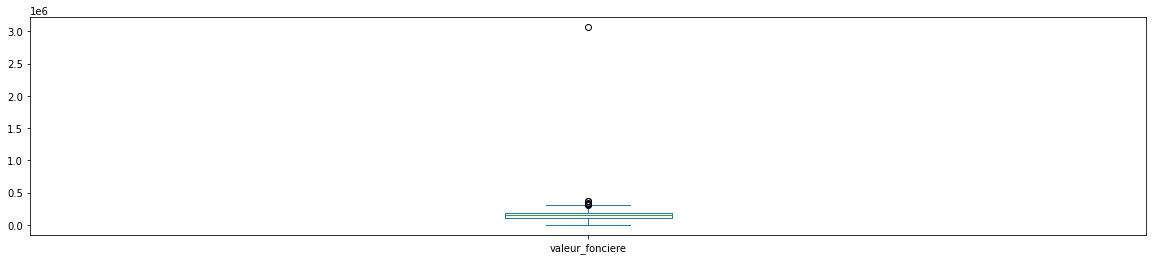

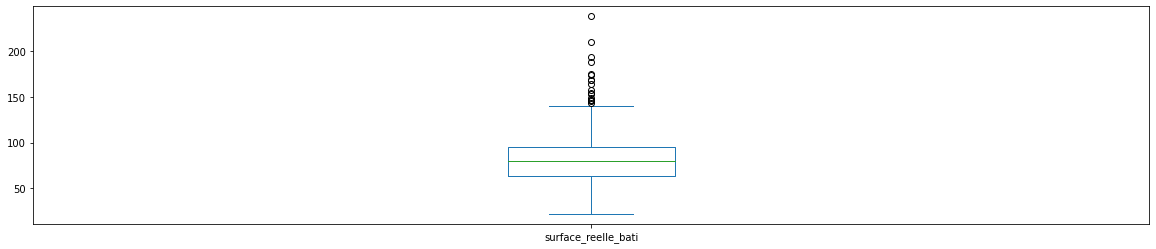

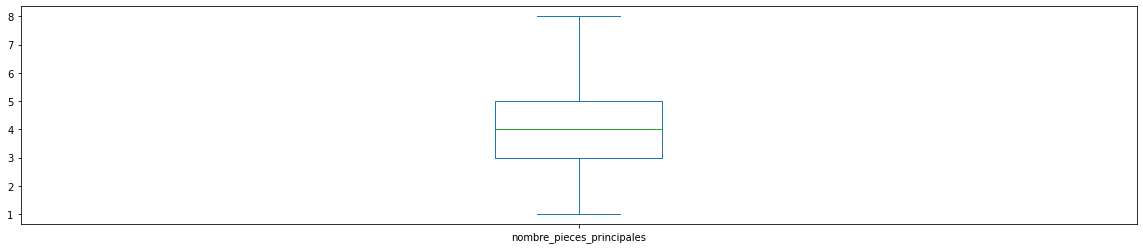

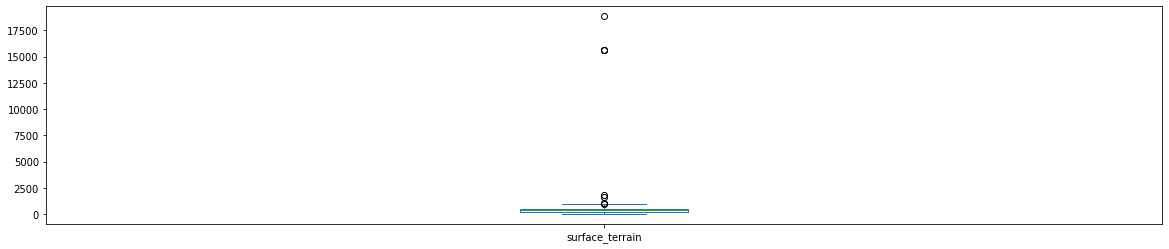

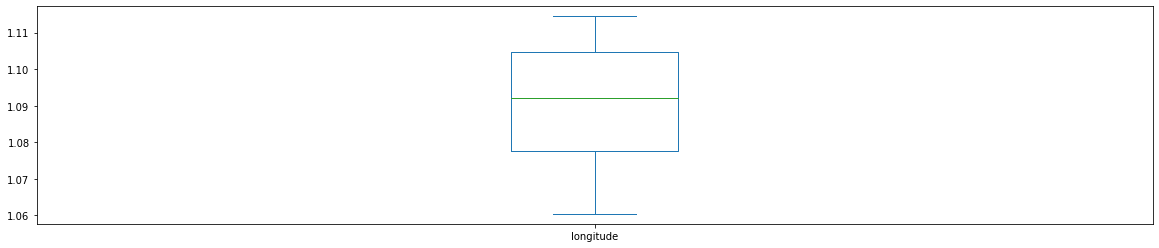

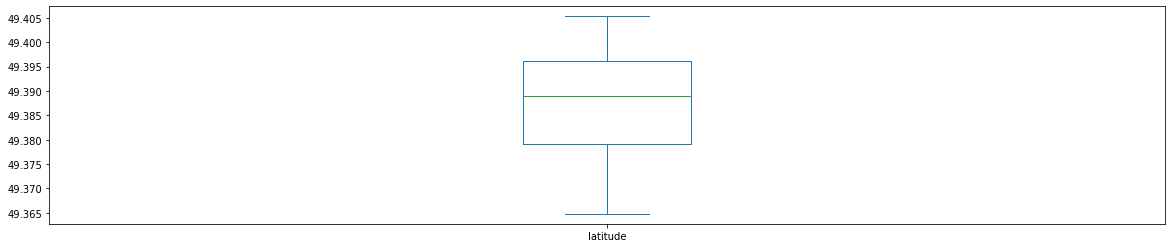

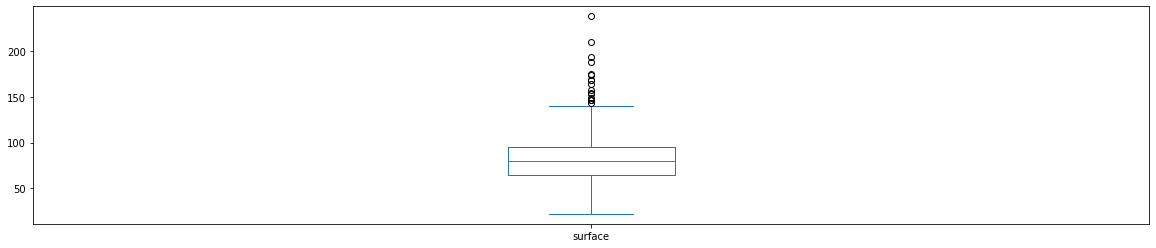

In [128]:
for l in float_cols :
    df[[l]].plot.box(figsize=(20, 4))
    plt.show()

In [129]:
largest_st = df['surface_terrain'].nlargest(len(df[df['surface_terrain'] > 1000]))
df = df.drop(largest_st.index)
largest_vf = df['valeur_fonciere'].nlargest(len(df[df['valeur_fonciere'] > 300000]))
df = df.drop(largest_vf.index)
largest_vf = df['surface'].nlargest(len(df[df['surface'] > 150]))
df = df.drop(largest_vf.index)
largest_vf = df['surface_reelle_bati'].nlargest(len(df[df['surface_reelle_bati'] > 150]))
df = df.drop(largest_vf.index) 

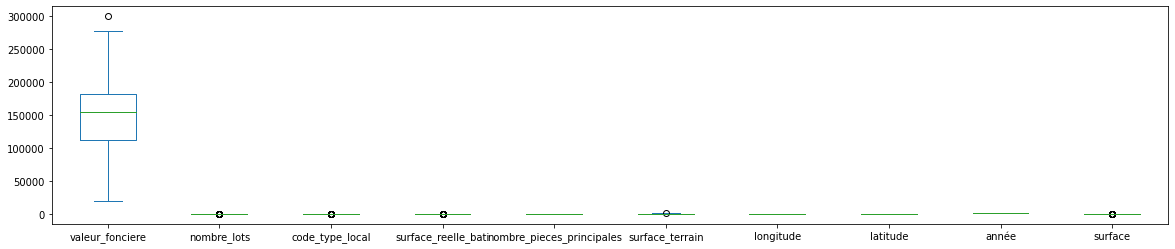

In [130]:
df.plot.box(figsize=(20, 4))

# Show the plot
plt.show()

In [131]:
df

,valeur_fonciere,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe,année,surface
16,73000.0,1,2,Appartement,100.0,5.0,0.0,1.071577,49.393501,000BS,2021,94.23
62,96500.0,1,2,Appartement,64.0,4.0,0.0,1.060400,49.392643,000BS,2020,63.43
71,200000.0,0,1,Maison,86.0,4.0,417.0,1.063211,49.392964,000BS,2020,86.00
110,112000.0,0,1,Maison,63.0,4.0,263.0,1.061100,49.394313,000BS,2019,63.00
117,69000.0,1,2,Appartement,31.0,1.0,0.0,1.071577,49.393501,000BS,2018,30.44
...,...,...,...,...,...,...,...,...,...,...,...,...
33,211550.0,0,1,Maison,130.0,6.0,53.0,1.105048,49.389845,000BD,2020,130.00
43,93000.0,0,1,Maison,83.0,4.0,133.0,1.105306,49.388171,000BD,2019,83.00
55,90000.0,0,1,Maison,58.0,3.0,58.0,1.105265,49.387870,000BD,2019,58.00
71,91000.0,0,1,Maison,54.0,3.0,43.0,1.105094,49.387773,000BD,2018,54.00


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230 entries, 16 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   valeur_fonciere            230 non-null    float64
 1   nombre_lots                230 non-null    int64  
 2   code_type_local            230 non-null    int8   
 3   type_local                 230 non-null    object 
 4   surface_reelle_bati        230 non-null    float64
 5   nombre_pieces_principales  230 non-null    float64
 6   surface_terrain            230 non-null    float64
 7   longitude                  230 non-null    float64
 8   latitude                   230 non-null    float64
 9   section_prefixe            230 non-null    object 
 10  année                      230 non-null    int64  
 11  surface                    230 non-null    float64
dtypes: float64(7), int64(2), int8(1), object(2)
memory usage: 21.8+ KB


## Visualisation :

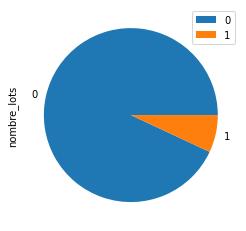

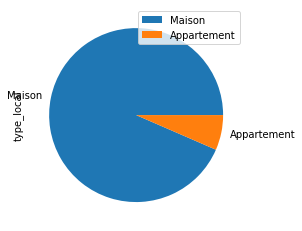

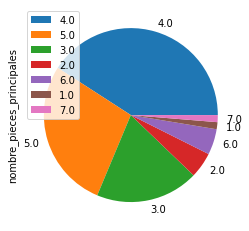

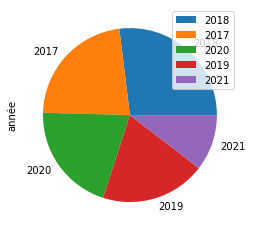

In [134]:
col = ['nombre_lots','type_local','nombre_pieces_principales','année']
for l in col :
    counts = df[[l]].apply(pd.value_counts)
    counts.plot.pie(subplots=True, figsize=(8, 4))
    plt.show()

In [135]:
df.to_csv('new_merged.csv')

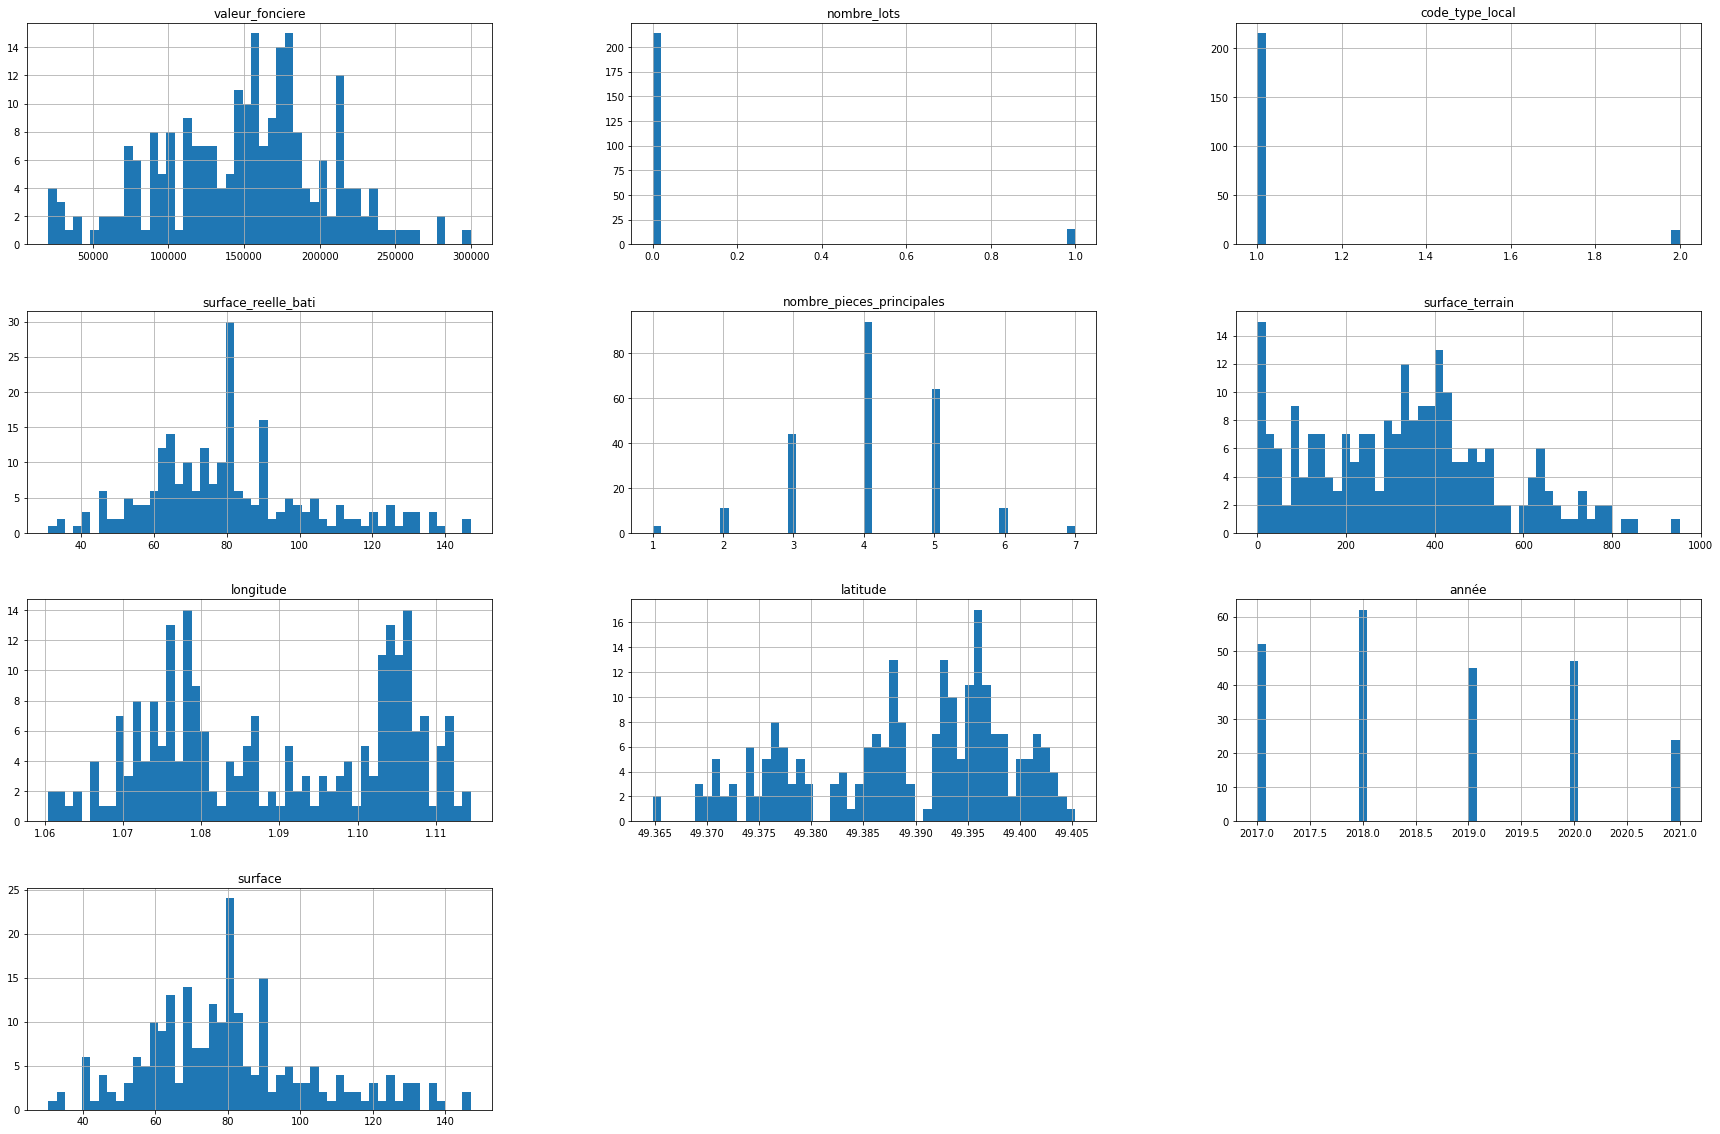

In [136]:
df.hist(bins=50, figsize=(30,20))
plt.show()
     

## Analyse exploratoire des données :
On essaie de trouver les valeurs qui influencent les prix :

<Figure size 144x576 with 0 Axes>

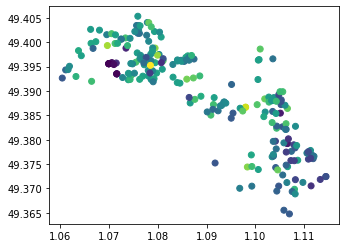

In [137]:
from shapely.geometry import Point

df['Coordinates'] = df.apply(lambda x: Point((x['longitude'], x['latitude'])), axis=1)
plt.figure(figsize=(2, 8))
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')
gdf.plot(column='valeur_fonciere')
df = df.drop(['Coordinates'], axis=1)
plt.show()

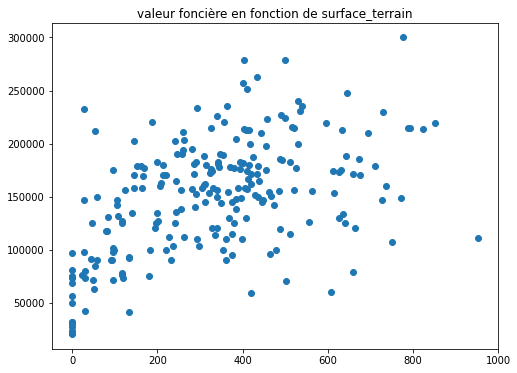

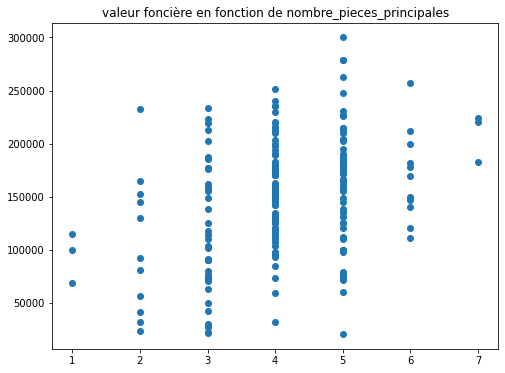

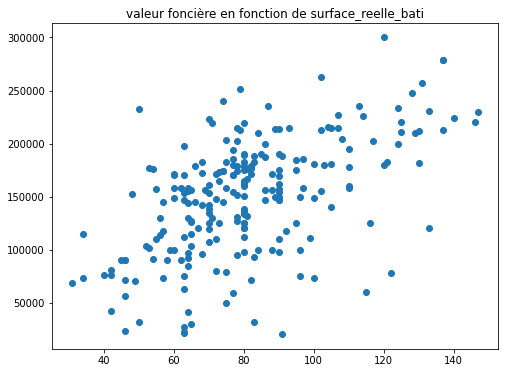

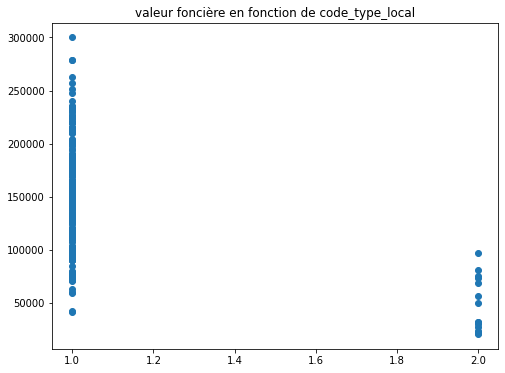

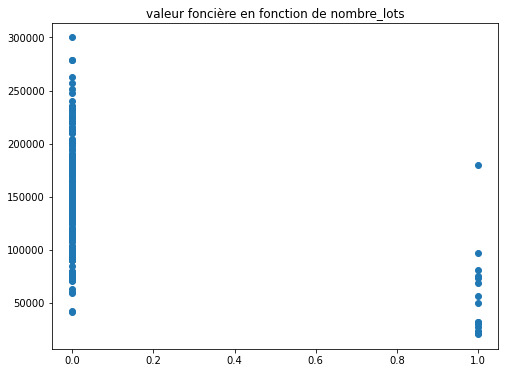

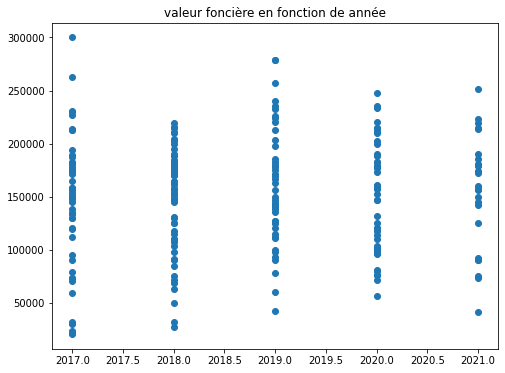

In [138]:
"""largest = df['surface_terrain'].nlargest(10)
df = df.drop(largest.index)
"""
col2 = ['surface_terrain', 'nombre_pieces_principales','surface_reelle_bati','code_type_local','nombre_lots','année']
for l in col2 :
    fig, ax = plt.subplots(figsize=(8,6))
    ax.scatter( df[[l]],df['valeur_fonciere'])
    plt.title('valeur foncière en fonction de ' + l)
    plt.show()

La matrice de coorélation :

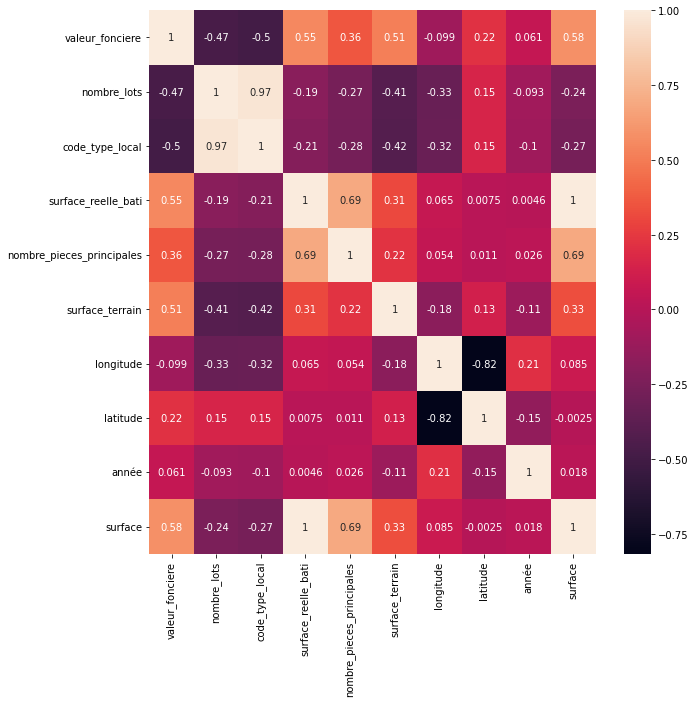

In [139]:
sns.heatmap(df.corr(), annot=True)
fig = plt.gcf()
fig.set_size_inches(10, 10)
plt.show()

# supprimer nombre_lots et code_commune

### Apprentissage :

In [152]:
df_train = df.sample(n=3000, random_state=7,replace=True)
#df_train = df
df_train

,valeur_fonciere,nombre_lots,code_type_local,type_local,surface_reelle_bati,nombre_pieces_principales,surface_terrain,longitude,latitude,section_prefixe,année,surface
101,135000.0,0,1,Maison,80.0,5.0,198.0,1.085871,49.396407,000AE,2017,80.0
17,125000.0,0,1,Maison,116.0,5.0,640.0,1.092362,49.385922,000BH,2021,116.0
71,160400.0,0,1,Maison,110.0,4.0,737.0,1.111311,49.377796,000AS,2020,110.0
165,170000.0,0,1,Maison,77.0,4.0,212.0,1.103322,49.388019,000BE,2018,77.0
33,178900.0,0,1,Maison,82.0,4.0,151.0,1.084534,49.391599,000BP,2020,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...
169,157930.0,0,1,Maison,64.0,3.0,304.0,1.074461,49.395622,000AD,2017,64.0
110,126000.0,0,1,Maison,65.0,4.0,555.0,1.076227,49.401804,000AC,2019,65.0
64,125000.0,0,1,Maison,70.0,3.0,380.0,1.104276,49.378116,000AW,2018,70.0
19,95000.0,0,1,Maison,78.0,4.0,374.0,1.091742,49.375222,000BK,2017,78.0


In [153]:
X = pd.DataFrame(np.c_[df_train["surface"],df_train['code_type_local'],df_train['surface_terrain'],df_train["nombre_pieces_principales"]], columns= ["surface",'code_type_local',"surface_terrain","nombre_pieces_principales"])
y = df_train["valeur_fonciere"]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

In [186]:
lmodellineaire = LinearRegression()
lmodellineaire.fit(X_train, y_train)

LinearRegression()

In [187]:
y_pred = lmodellineaire.predict(X_test)
rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),2)
r2 = round(r2_score(y_test, y_pred),4)

print(f"L'erreur quadratique moyenne est {rmse}€")
print(f"Taux de bonne classification {np.ceil(r2*100)}%")

L'erreur quadratique moyenne est 36195.04€
Taux de bonne classification 58.0%


In [188]:
accuracy = lmodellineaire.score(X_test, y_test)
"Accuracy: {}%".format(int(round(accuracy * 100)))

'Accuracy: 58%'

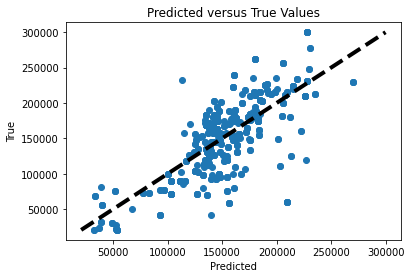

In [189]:
plt.scatter(y_pred, y_test)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted versus True Values')

plt.show()

In [192]:
surface = 50
nbpieces = 2
terrain = 100
code_local = 2
df_estim = [[surface,code_local,terrain,nbpieces]]
estimation = round(lmodellineaire.predict(df_estim)[0],2)
estimation

/home/hiba/.local/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


56091.69

Lasso :

In [103]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.4, normalize=True)
lasso.fit(X_train,y_train)

/home/hiba/.local/lib/python3.8/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Lasso(alpha=0.4, normalize=True)

In [104]:
y_pred_lasso = lasso.predict(X_test)
rmse_lasso = round(np.sqrt(mean_squared_error(y_test, y_pred_lasso)),2)
r2_lasso = round(r2_score(y_test, y_pred_lasso),4)

print(f"L'erreur quadratique moyenne est {rmse_lasso}€")
print(f"Taux de bonne classification {ceil(r2_lasso*100)}%")
print('\n')

L'erreur quadratique moyenne est 36190.75€
Taux de bonne classification 57.56%




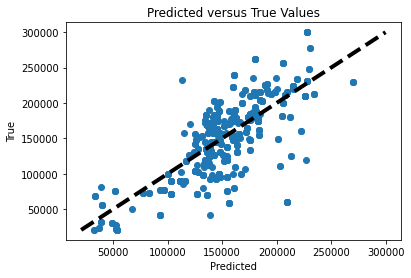

In [105]:
plt.scatter(y_pred_lasso, y_test)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Predicted versus True Values')
plt.show()